In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from pylab import rcParams
rcParams['figure.figsize']= 20, 5

In [2]:
test = pd.read_csv("D:\\Data_sets\\house-prices-advanced-regression-techniques\\test.csv")

In [3]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [4]:
test.shape

(1459, 80)

In [5]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
percent_missing = test.isnull().sum() * 100 / len(test)
missing_value_df = pd.DataFrame({'column_name': test.columns,'percent_missing': percent_missing})

In [8]:
missing_value_df[missing_value_df.percent_missing > 50]

,column_name,percent_missing
Alley,Alley,92.666210
FireplaceQu,FireplaceQu,50.034270
PoolQC,PoolQC,99.794380
Fence,Fence,80.123372
MiscFeature,MiscFeature,96.504455


<AxesSubplot:>

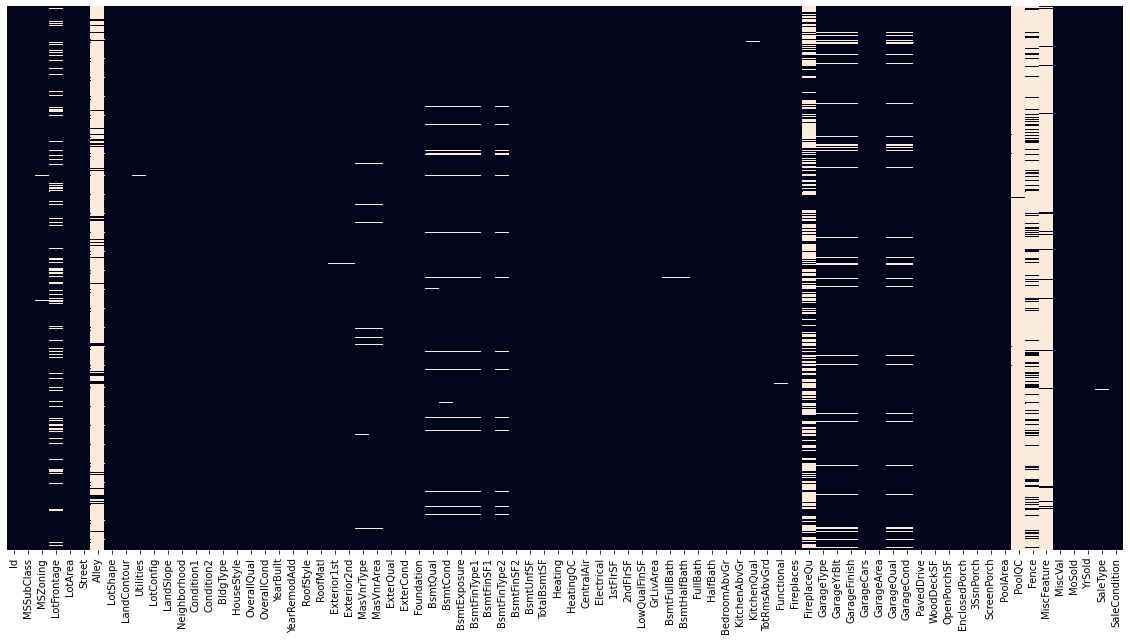

In [9]:
plt.figure(figsize = (20,10))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)


### Id

In [10]:
test.drop('Id', axis=1, inplace=True)

### MSSubClass: Identifies the type of dwelling involved in the sale

In [11]:
test.MSSubClass.isnull().sum() * 100 / len(test)

0.0

### MSZoning: Identifies the general zoning classification of the sale.

In [12]:
test.MSZoning.isnull().sum() * 100 / len(test)

0.27416038382453733

In [13]:
test.MSZoning

0       RH
1       RL
2       RL
3       RL
4       RL
        ..
1454    RM
1455    RM
1456    RL
1457    RL
1458    RL
Name: MSZoning, Length: 1459, dtype: object

In [14]:
test.MSZoning = test.MSZoning.fillna(test.MSZoning.mode()[0])

### LotFrontage: Linear feet of street connected to property

In [15]:
test.LotFrontage.isnull().sum()  * 100 / len(test)

15.558601782042494

In [16]:
test.LotFrontage

0        80.0
1        81.0
2        74.0
3        78.0
4        43.0
        ...  
1454     21.0
1455     21.0
1456    160.0
1457     62.0
1458     74.0
Name: LotFrontage, Length: 1459, dtype: float64

In [17]:
test.LotFrontage = test.LotFrontage.fillna(test.LotFrontage.mean())

### LotArea: Lot size in square feet

In [18]:
test.LotArea.isnull().sum()

0

### Street: Type of road access to property

In [19]:
test.Street.isnull().sum()

0

### Alley: Type of alley access to property

In [20]:
test.Alley.isnull().sum() * 100 / len(test)

92.66620973269363

In [21]:
test.drop('Alley', axis=1, inplace=True)

### LotShape: General shape of property

In [22]:
test.LotShape.isnull().sum() * 100 / len(test)

0.0

### LandContour: Flatness of the property

In [23]:
test.LandContour.isnull().sum() * 100 / len(test)

0.0

### Utilities: Type of utilities available

In [24]:
test.Utilities.isnull().sum() * 100 / len(test)

0.13708019191226867

In [25]:
test.Utilities

0       AllPub
1       AllPub
2       AllPub
3       AllPub
4       AllPub
         ...  
1454    AllPub
1455    AllPub
1456    AllPub
1457    AllPub
1458    AllPub
Name: Utilities, Length: 1459, dtype: object

In [26]:
test.Utilities = test.Utilities.fillna(test.Utilities.mode()[0])

### LotConfig: Lot configuration

In [27]:
test.LotConfig.isnull().sum() * 100 / len(test)

0.0

### LandSlope: Slope of property

In [28]:
test.LandSlope.isnull().sum() * 100 / len(test)

0.0

### Neighborhood: Physical locations within Ames city limits

In [29]:
test.Neighborhood.isnull().sum() * 100 / len(test)

0.0

### Condition1: Proximity to various conditions

In [30]:
test.Condition1.isnull().sum() * 100 / len(test)

0.0

### Condition2: Proximity to various conditions (if more than one is present)

In [31]:
test.Condition2.isnull().sum() * 100 / len(test)

0.0

### BldgType: Type of dwelling

In [32]:
test.BldgType.isnull().sum() * 100 / len(test)

0.0

### HouseStyle: Style of dwelling

In [33]:
test.HouseStyle.isnull().sum() * 100 / len(test)

0.0

### OverallQual: Rates the overall material and finish of the house

In [34]:
test.OverallQual.isnull().sum() * 100 / len(test)

0.0

### OverallCond: Rates the overall condition of the house

In [35]:
test.OverallCond.isnull().sum() * 100 / len(test)

0.0

### YearBuilt: Original construction date

In [36]:
test.YearBuilt.isnull().sum() * 100 / len(test)

0.0

### YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

In [37]:
test.YearRemodAdd.isnull().sum() * 100 / len(test)

0.0

### RoofStyle: Type of roof

In [38]:
test.RoofStyle.isnull().sum() * 100 / len(test)

0.0

### RoofMatl: Roof material

In [39]:
test.RoofMatl.isnull().sum() * 100 / len(test)

0.0

### Exterior1st: Exterior covering on house

In [40]:
test.Exterior1st.isnull().sum() * 100 / len(test)

0.06854009595613433

In [41]:
test.Exterior1st

0       VinylSd
1       Wd Sdng
2       VinylSd
3       VinylSd
4       HdBoard
         ...   
1454    CemntBd
1455    CemntBd
1456    VinylSd
1457    HdBoard
1458    HdBoard
Name: Exterior1st, Length: 1459, dtype: object

In [42]:
test.Exterior1st = test.Exterior1st.fillna(test.Exterior1st.mode()[0])

### Exterior2nd: Exterior covering on house (if more than one material)

In [43]:
test.Exterior2nd.isnull().sum() * 100 / len(test)

0.06854009595613433

In [44]:
test.Exterior2nd

0       VinylSd
1       Wd Sdng
2       VinylSd
3       VinylSd
4       HdBoard
         ...   
1454    CmentBd
1455    CmentBd
1456    VinylSd
1457    Wd Shng
1458    HdBoard
Name: Exterior2nd, Length: 1459, dtype: object

In [45]:
test.Exterior2nd = test.Exterior2nd.fillna(test.Exterior2nd.mode()[0])

### MasVnrType: Masonry veneer type

In [46]:
test.MasVnrType.isnull().sum() * 100 / len(test)

1.0966415352981493

In [47]:
test.MasVnrType

0          None
1       BrkFace
2          None
3       BrkFace
4          None
         ...   
1454       None
1455       None
1456       None
1457       None
1458    BrkFace
Name: MasVnrType, Length: 1459, dtype: object

In [48]:
test.MasVnrType = test.MasVnrType.fillna(test.MasVnrType.mode()[0])

### MasVnrArea: Masonry veneer area in square feet

In [49]:
test.MasVnrArea.isnull().sum() * 100 / len(test)

1.0281014393420151

In [50]:
test.MasVnrArea

0         0.0
1       108.0
2         0.0
3        20.0
4         0.0
        ...  
1454      0.0
1455      0.0
1456      0.0
1457      0.0
1458     94.0
Name: MasVnrArea, Length: 1459, dtype: float64

In [51]:
test.MasVnrArea = test.MasVnrArea.fillna(test.MasVnrArea.mean())

### ExterQual: Evaluates the quality of the material on the exterior

In [52]:
test.ExterQual.isnull().sum() * 100 / len(test)

0.0

### ExterCond: Evaluates the present condition of the material on the exterior

In [53]:
test.ExterCond.isnull().sum() * 100 / len(test)

0.0

### Foundation: Type of foundation

In [54]:
test.Foundation.isnull().sum() * 100 / len(test)

0.0

### BsmtQual: Evaluates the height of the basement

In [55]:
test.BsmtQual.isnull().sum() * 100 / len(test)

3.015764222069911

In [56]:
test.BsmtQual

0       TA
1       TA
2       Gd
3       TA
4       Gd
        ..
1454    TA
1455    TA
1456    TA
1457    Gd
1458    Gd
Name: BsmtQual, Length: 1459, dtype: object

In [57]:
test.BsmtQual = test.BsmtQual.fillna(test.BsmtQual.mode()[0])

### BsmtCond: Evaluates the general condition of the basement

In [58]:
test.BsmtCond.isnull().sum() * 100 / len(test)

3.0843043180260454

In [59]:
test.BsmtCond

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1454    TA
1455    TA
1456    TA
1457    TA
1458    TA
Name: BsmtCond, Length: 1459, dtype: object

In [60]:
test.BsmtCond = test.BsmtCond.fillna(test.BsmtCond.mode()[0])

### BsmtExposure: Refers to walkout or garden level walls

In [61]:
test.BsmtExposure.isnull().sum() * 100 / len(test)

3.015764222069911

In [62]:
test.BsmtExposure

0       No
1       No
2       No
3       No
4       No
        ..
1454    No
1455    No
1456    No
1457    Av
1458    Av
Name: BsmtExposure, Length: 1459, dtype: object

In [63]:
test.BsmtExposure = test.BsmtExposure.fillna(test.BsmtExposure.mode()[0])

### BsmtFinType1: Rating of basement finished area

In [64]:
test.BsmtFinType1.isnull().sum() * 100 / len(test)

2.8786840301576424

In [65]:
test.BsmtFinType1

0       Rec
1       ALQ
2       GLQ
3       GLQ
4       ALQ
       ... 
1454    Unf
1455    Rec
1456    ALQ
1457    GLQ
1458    LwQ
Name: BsmtFinType1, Length: 1459, dtype: object

In [66]:
test.BsmtFinType1 = test.BsmtFinType1.fillna(test.BsmtFinType1.mode()[0])

### BsmtFinSF1: Type 1 finished square feet

In [67]:
test.BsmtFinSF1.isnull().sum() * 100 / len(test)

0.06854009595613433

In [68]:
test.BsmtFinSF1

0        468.0
1        923.0
2        791.0
3        602.0
4        263.0
         ...  
1454       0.0
1455     252.0
1456    1224.0
1457     337.0
1458     758.0
Name: BsmtFinSF1, Length: 1459, dtype: float64

In [69]:
test.BsmtFinSF1 = test.BsmtFinSF1.fillna(test.BsmtFinSF1.mean())

### BsmtFinType2: Rating of basement finished area (if multiple types)

In [70]:
test.BsmtFinType2.isnull().sum() * 100 / len(test)

2.8786840301576424

In [71]:
test.BsmtFinType2

0       LwQ
1       Unf
2       Unf
3       Unf
4       Unf
       ... 
1454    Unf
1455    Unf
1456    Unf
1457    Unf
1458    Unf
Name: BsmtFinType2, Length: 1459, dtype: object

In [72]:
test.BsmtFinType2 = test.BsmtFinType2.fillna(test.BsmtFinType2.mode()[0])

### BsmtFinSF2: Type 2 finished square feet

In [73]:
test.BsmtFinSF2.isnull().sum() * 100 / len(test)

0.06854009595613433

In [74]:
test.BsmtFinSF2

0       144.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
1454      0.0
1455      0.0
1456      0.0
1457      0.0
1458      0.0
Name: BsmtFinSF2, Length: 1459, dtype: float64

In [75]:
test.BsmtFinSF2 = test.BsmtFinSF2.fillna(test.BsmtFinSF2.mean())

### BsmtUnfSF: Unfinished square feet of basement area

In [76]:
test.BsmtUnfSF.isnull().sum() * 100 / len(test)

0.06854009595613433

In [77]:
test.BsmtUnfSF

0        270.0
1        406.0
2        137.0
3        324.0
4       1017.0
         ...  
1454     546.0
1455     294.0
1456       0.0
1457     575.0
1458     238.0
Name: BsmtUnfSF, Length: 1459, dtype: float64

In [78]:
test.BsmtUnfSF = test.BsmtUnfSF.fillna(test.BsmtUnfSF.mean())

### TotalBsmtSF: Total square feet of basement area

In [79]:
test.TotalBsmtSF.isnull().sum() * 100 / len(test)

0.06854009595613433

In [80]:
test.TotalBsmtSF

0        882.0
1       1329.0
2        928.0
3        926.0
4       1280.0
         ...  
1454     546.0
1455     546.0
1456    1224.0
1457     912.0
1458     996.0
Name: TotalBsmtSF, Length: 1459, dtype: float64

In [81]:
test.TotalBsmtSF = test.TotalBsmtSF.fillna(test.TotalBsmtSF.mean())

### Heating: Type of heating

In [82]:
test.Heating.isnull().sum() * 100 / len(test)

0.0

### HeatingQC: Heating quality and condition

In [83]:
test.HeatingQC.isnull().sum() * 100 / len(test)

0.0

### CentralAir: Central air conditioning

In [84]:
test.CentralAir.isnull().sum() * 100 / len(test)

0.0

### Electrical: Electrical system

In [85]:
test.Electrical.isnull().sum() * 100 / len(test)

0.0

### 1stFlrSF: First Floor square feet

In [86]:
test['1stFlrSF'].isnull().sum() * 100 / len(test)

0.0

### 2ndFlrSF: Second floor square feet

In [87]:
test['2ndFlrSF'].isnull().sum() * 100 / len(test)

0.0

### LowQualFinSF: Low quality finished square feet (all floors)

In [88]:
test.LowQualFinSF.isnull().sum() * 100 / len(test)

0.0

### GrLivArea: Above grade (ground) living area square feet

In [89]:
test.GrLivArea.isnull().sum() * 100 / len(test)

0.0

### BsmtFullBath: Basement full bathrooms

In [90]:
test.BsmtFullBath.isnull().sum() * 100 / len(test)

0.13708019191226867

In [91]:
test.BsmtFullBath

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1454    0.0
1455    0.0
1456    1.0
1457    0.0
1458    0.0
Name: BsmtFullBath, Length: 1459, dtype: float64

In [92]:
test.BsmtFullBath = test.BsmtFullBath.fillna(test.BsmtFullBath.mean())

### BsmtHalfBath: Basement half bathrooms

In [93]:
test.BsmtHalfBath.isnull().sum() * 100 / len(test)

0.13708019191226867

In [94]:
test.BsmtHalfBath

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1454    0.0
1455    0.0
1456    0.0
1457    1.0
1458    0.0
Name: BsmtHalfBath, Length: 1459, dtype: float64

In [95]:
test.BsmtHalfBath = test.BsmtHalfBath.fillna(test.BsmtHalfBath.mean())

### FullBath: Full bathrooms above grade

In [96]:
test.FullBath.isnull().sum() * 100 / len(test)

0.0

### HalfBath: Half baths above grade

In [97]:
test.HalfBath.isnull().sum() * 100 / len(test)

0.0

### BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

In [98]:
test.BedroomAbvGr.isnull().sum() * 100 / len(test)

0.0

### KitchenAbvGr: Kitchens above grade

In [99]:
test.KitchenAbvGr.isnull().sum() * 100 / len(test)

0.0

### KitchenQual: Kitchen quality

In [100]:
test.KitchenQual.isnull().sum() * 100 / len(test)

0.06854009595613433

In [101]:
test.KitchenQual

0       TA
1       Gd
2       TA
3       Gd
4       Gd
        ..
1454    TA
1455    TA
1456    TA
1457    TA
1458    TA
Name: KitchenQual, Length: 1459, dtype: object

In [102]:
test.KitchenQual = test.KitchenQual.fillna(test.KitchenQual.mode()[0])

### TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

In [103]:
test.TotRmsAbvGrd.isnull().sum() * 100 / len(test)

0.0

### Functional: Home functionality (Assume typical unless deductions are warranted)

In [104]:
test.Functional.isnull().sum() * 100 / len(test)

0.13708019191226867

In [105]:
test.Functional

0       Typ
1       Typ
2       Typ
3       Typ
4       Typ
       ... 
1454    Typ
1455    Typ
1456    Typ
1457    Typ
1458    Typ
Name: Functional, Length: 1459, dtype: object

In [106]:
test.Functional = test.Functional.fillna(test.Functional.mode()[0])

### Fireplaces: Number of fireplaces

In [107]:
test.Fireplaces.isnull().sum() * 100 / len(test)

0.0

### FireplaceQu: Fireplace quality

In [108]:
test.FireplaceQu.isnull().sum() * 100 / len(test)

50.03427004797807

In [109]:
test.FireplaceQu

0       NaN
1       NaN
2        TA
3        Gd
4       NaN
       ... 
1454    NaN
1455    NaN
1456     TA
1457    NaN
1458     TA
Name: FireplaceQu, Length: 1459, dtype: object

In [110]:
test.FireplaceQu = test.FireplaceQu.fillna(test.FireplaceQu.mode()[0])

### GarageType: Garage location

In [111]:
test.GarageType.isnull().sum() * 100 / len(test)

5.2090472926662095

In [112]:
test.GarageType

0        Attchd
1        Attchd
2        Attchd
3        Attchd
4        Attchd
         ...   
1454        NaN
1455    CarPort
1456     Detchd
1457        NaN
1458     Attchd
Name: GarageType, Length: 1459, dtype: object

In [113]:
test.GarageType= test.GarageType.fillna(test.GarageType.mode()[0])

### GarageYrBlt: Year garage was built

In [114]:
test.GarageYrBlt.isnull().sum() * 100 / len(test)

5.346127484578479

In [115]:
test.GarageYrBlt

0       1961.0
1       1958.0
2       1997.0
3       1998.0
4       1992.0
         ...  
1454       NaN
1455    1970.0
1456    1960.0
1457       NaN
1458    1993.0
Name: GarageYrBlt, Length: 1459, dtype: float64

In [116]:
test.GarageYrBlt = test.GarageYrBlt.fillna(test.GarageYrBlt.mean())

### GarageFinish: Interior finish of the garage

In [117]:
test.GarageFinish.isnull().sum() * 100 / len(test)

5.346127484578479

In [118]:
test.GarageFinish

0       Unf
1       Unf
2       Fin
3       Fin
4       RFn
       ... 
1454    NaN
1455    Unf
1456    Unf
1457    NaN
1458    Fin
Name: GarageFinish, Length: 1459, dtype: object

In [119]:
test.GarageFinish = test.GarageFinish.fillna(test.GarageFinish.mode()[0])

### GarageCars: Size of garage in car capacity

In [120]:
test.GarageCars.isnull().sum() * 100 / len(test)

0.06854009595613433

In [121]:
test.GarageCars

0       1.0
1       1.0
2       2.0
3       2.0
4       2.0
       ... 
1454    0.0
1455    1.0
1456    2.0
1457    0.0
1458    3.0
Name: GarageCars, Length: 1459, dtype: float64

In [122]:
test.GarageCars = test.GarageCars.fillna(test.GarageCars.mean())

### GarageArea: Size of garage in square feet

In [123]:
test.GarageArea.isnull().sum() * 100 / len(test)

0.06854009595613433

In [124]:
test.GarageArea

0       730.0
1       312.0
2       482.0
3       470.0
4       506.0
        ...  
1454      0.0
1455    286.0
1456    576.0
1457      0.0
1458    650.0
Name: GarageArea, Length: 1459, dtype: float64

In [125]:
test.GarageArea = test.GarageArea.fillna(test.GarageArea.mean())

### GarageQual: Garage quality

In [126]:
test.GarageQual.isnull().sum() * 100 / len(test)

5.346127484578479

In [127]:
test.GarageQual

0        TA
1        TA
2        TA
3        TA
4        TA
       ... 
1454    NaN
1455     TA
1456     TA
1457    NaN
1458     TA
Name: GarageQual, Length: 1459, dtype: object

In [128]:
test.GarageQual = test.GarageQual.fillna(test.GarageQual.mode()[0])

### GarageCond: Garage condition

In [129]:
test.GarageCond.isnull().sum() * 100 / len(test)

5.346127484578479

In [130]:
test.GarageCond

0        TA
1        TA
2        TA
3        TA
4        TA
       ... 
1454    NaN
1455     TA
1456     TA
1457    NaN
1458     TA
Name: GarageCond, Length: 1459, dtype: object

In [131]:
test.GarageCond = test.GarageCond.fillna(test.GarageCond.mode()[0])

### PavedDrive: Paved driveway

In [132]:
test.PavedDrive.isnull().sum() * 100 / len(test)

0.0

### WoodDeckSF: Wood deck area in square feet

In [133]:
test.WoodDeckSF.isnull().sum() * 100 / len(test)

0.0

### OpenPorchSF: Open porch area in square feet

In [134]:
test.OpenPorchSF.isnull().sum() * 100 / len(test)

0.0

### EnclosedPorch: Enclosed porch area in square feet

In [135]:
test.EnclosedPorch.isnull().sum() * 100 / len(test)

0.0

### 3SsnPorch: Three season porch area in square feet

In [136]:
test['3SsnPorch'].isnull().sum() * 100 / len(test)

0.0

### ScreenPorch: Screen porch area in square feet

In [137]:
test.ScreenPorch.isnull().sum() * 100 / len(test)

0.0

### PoolArea: Pool area in square feet

In [138]:
test.PoolArea.isnull().sum() * 100 / len(test)

0.0

### PoolQC: Pool quality

In [139]:
test.PoolQC.isnull().sum() * 100 / len(test)

99.7943797121316

In [140]:
test.drop('PoolQC', axis=1, inplace=True)

### Fence: Fence quality

In [141]:
test.Fence.isnull().sum() * 100 / len(test)

80.12337217272105

In [142]:
test.drop('Fence', axis=1, inplace=True)

### MiscFeature: Miscellaneous feature not covered in other categories

In [143]:
test.MiscFeature.isnull().sum() * 100 / len(test)

96.50445510623715

In [144]:
test.drop('MiscFeature', axis=1, inplace=True)

### MiscVal: $Value of miscellaneous feature

In [145]:
test.MoSold.isnull().sum() * 100 / len(test)

0.0

### MoSold: Month Sold (MM)

In [146]:
test.MoSold.isnull().sum() * 100 / len(test)

0.0

### YrSold: Year Sold (YYYY)

In [147]:
test.YrSold.isnull().sum() * 100 / len(test)

0.0

### SaleType: Type of sale

In [148]:
test.SaleType.isnull().sum() * 100 / len(test)

0.06854009595613433

In [149]:
test.SaleType

0       WD
1       WD
2       WD
3       WD
4       WD
        ..
1454    WD
1455    WD
1456    WD
1457    WD
1458    WD
Name: SaleType, Length: 1459, dtype: object

In [150]:
test.SaleType = test.SaleType.fillna(test.SaleType.mode()[0])

### SaleCondition: Condition of sale

In [151]:
test.SaleCondition.isnull().sum() * 100 / len(test)

0.0

In [152]:
test.isnull().sum().sum()

0

In [155]:
test.shape

(1459, 75)

In [156]:
test.to_csv("test.csv", index=False)